In [1]:
import sys 
import pdb
import torch
import torch.utils.data
from torchvision import datasets, transforms
import torch.optim as optim
from attrdict import AttrDict
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import importlib
import numpy as np

#sys.path.append('../data/Hasy/')
sys.path.append('../src/codebase')

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [3]:
from main_hasy import load_hasy_data

In [4]:
%load_ext autoreload 
%autoreload 2

In [5]:
# Reproducibility
np.random.seed(2018)
torch.manual_seed(2018)

### Set Parameters

In [6]:
outdir = '../src/out/hasy/'
ckpdir = '../src/checkpoints/hasy/'

# Just needed for data loading, really
args = AttrDict({'batch_size': 64,
                 'lr': 0.001,
                 'momentum': 0.5,
                 'epochs': 10,
                 'num_workers': 2,
                 'log_interval': 10})

# Reproducibility
np.random.seed(2018)

### Load Data

In [7]:
# Load data
train_loader, valid_loader, test_loader, dataset, sym2ind, ind2sym  = \
    load_hasy_data('../data/Hasy/', splits = (0.1,0.1),
    batch_size=args.batch_size,num_workers=args.num_workers)

len(dataset)

168233

In [8]:
# Grab a batch for experiments
batch_x, batch_y = next(iter(train_loader))

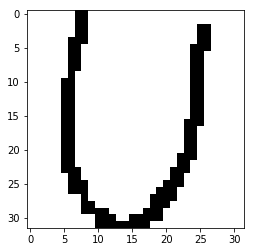

In [9]:
idx = 4
plt.imshow(batch_x[idx].squeeze(), cmap = 'Greys')


Examples:


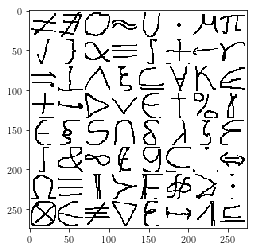

Ground Truth:


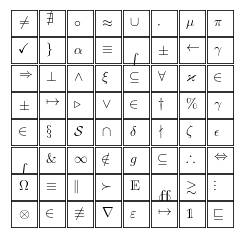

In [10]:
#B = next(iter(train_loader))
from IPython.display import display, Math

import utils
importlib.reload(utils)
from utils import tensorshow, make_latex_grid

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath,amssymb,amsthm,mathrsfs,amsfonts,dsfont,wasysym,cmll,stmaryrd, gensymb}'] #for \text command
from torchvision.utils import make_grid

print('Examples:')    
tensorshow(make_grid(batch_x[:64]), True)
print('Ground Truth:')
make_latex_grid([ind2sym[label.item()] for label in batch_y[:64]])

### Load Classifier

In [11]:
from models import image_classifier
classifier = image_classifier.load(os.path.join(ckpdir, "classif.pth"))

In [12]:
output = classifier(batch_x)
#print(output)
p, pred = output.max(1)

print(100*(pred == batch_y).sum().item()/len(pred))


89.0625


In [13]:
import importlib
import main_hasy
importlib.reload(main_hasy)
from main_hasy import load_full_dataset

### Load Masked Classifier

In [14]:
import models
importlib.reload(models)
from models import masked_image_classifier

mask_size = (10,10)

model_path = os.path.join(ckpdir, "mask_model_{}x{}.pth").format(*mask_size)
mask_model = masked_image_classifier.load(model_path)


In [6]:

importlib.reload(matplotlib)
matplotlib.use('PS')

import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

import utils
importlib.reload(utils)

import attrib_optim
importlib.reload(attrib_optim)
from attrib_optim import MCExplainer
import re
classes_tex = [r'${}$'.format(s) for s in ind2sym]

crit_alpha = .1
crit_p = 2
reg_type = 'exp'
Exp = MCExplainer(classifier, mask_model, classes = classes_tex,
                  reg_type = reg_type,
                  crit_alpha = crit_alpha,
                  crit_p = crit_p, plot_type = 'treemap')

# 12, 25, 30
idx = 63
x  = batch_x[idx:idx+1]
print(classes_tex[batch_y[idx].item()])

fx = classifier(x)
p, pred = fx.max(1)

plt.imshow(x.squeeze(), cmap='Greys')
plt.title('Prediction: ' + classes_tex[pred] + ' (class no.{})'.format(pred.item()), fontsize = 20)
plt.xticks([])
plt.yticks([])
plt.show()


e = Exp.explain(x, pred.item(), verbose = 0 , show_plot = 1)


# save_path = '../out/expl_hasy_id-{}_alpha-{}_'.format(idx, crit_alpha, crit_p)
# e.plot(save_path = save_path)

NameError: name 'ind2sym' is not defined

Done!


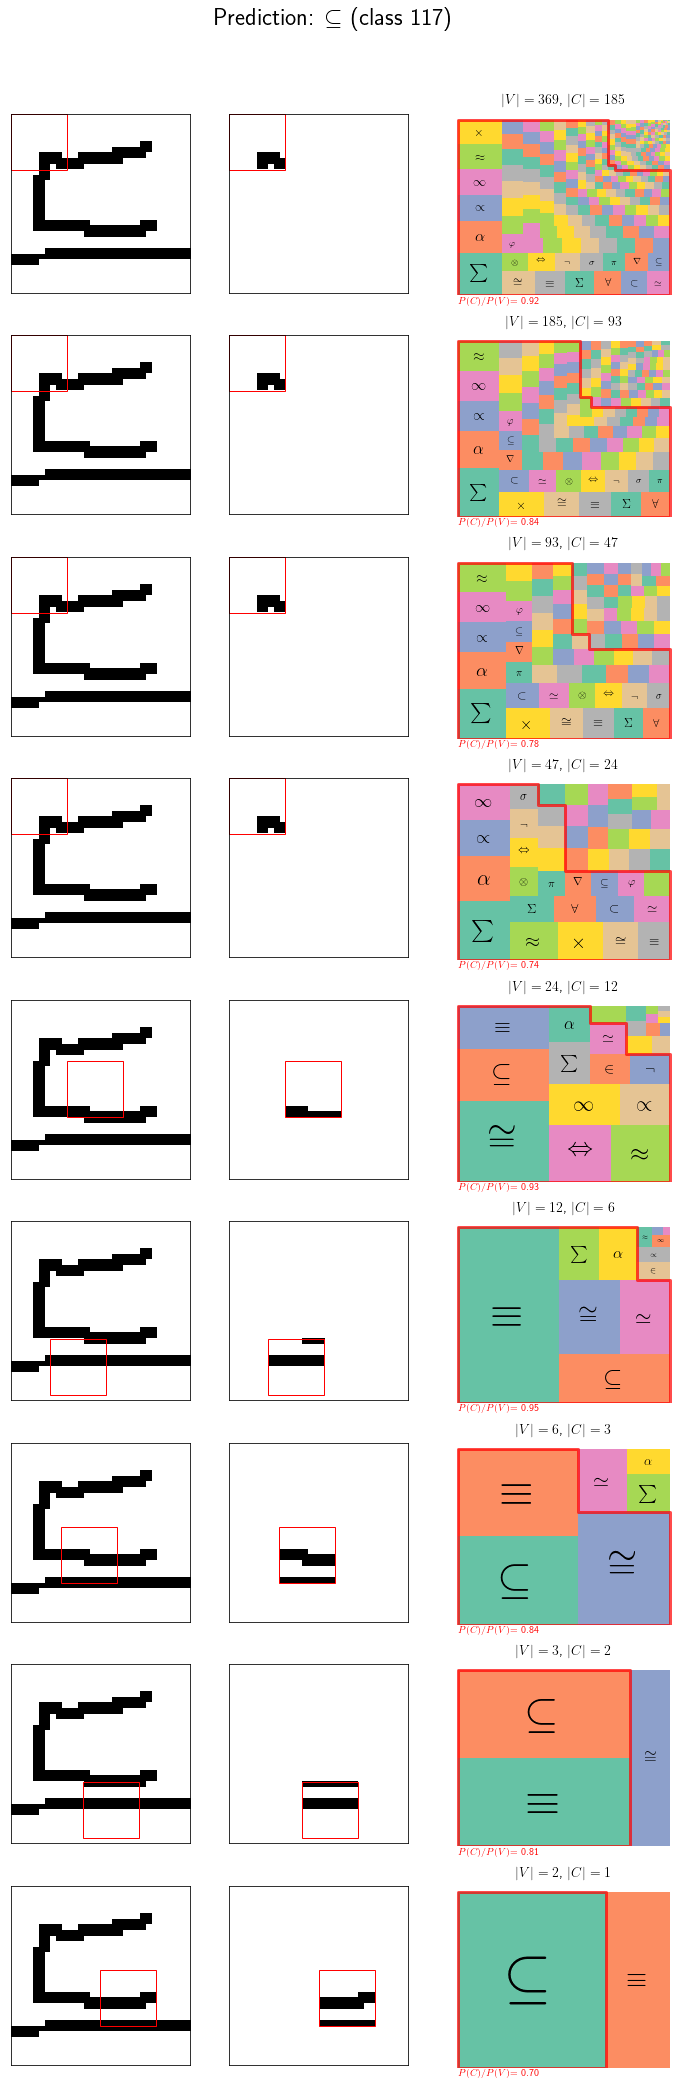

In [25]:
save_path = None
#save_path = os.path.join(outdir, 'expl_id-{}_alpha-{}.pdf'.format(idx, crit_alpha, crit_p))
e.plot(save_path = save_path)

Best objective:  -0.0137 (i = 18, j = 15)
Best objective:  -0.0066 (i = 10, j =  6)
Best objective:   0.0029 (i = 18, j = 10)
Best objective:   0.0852 (i = 14, j = 17)
Done!


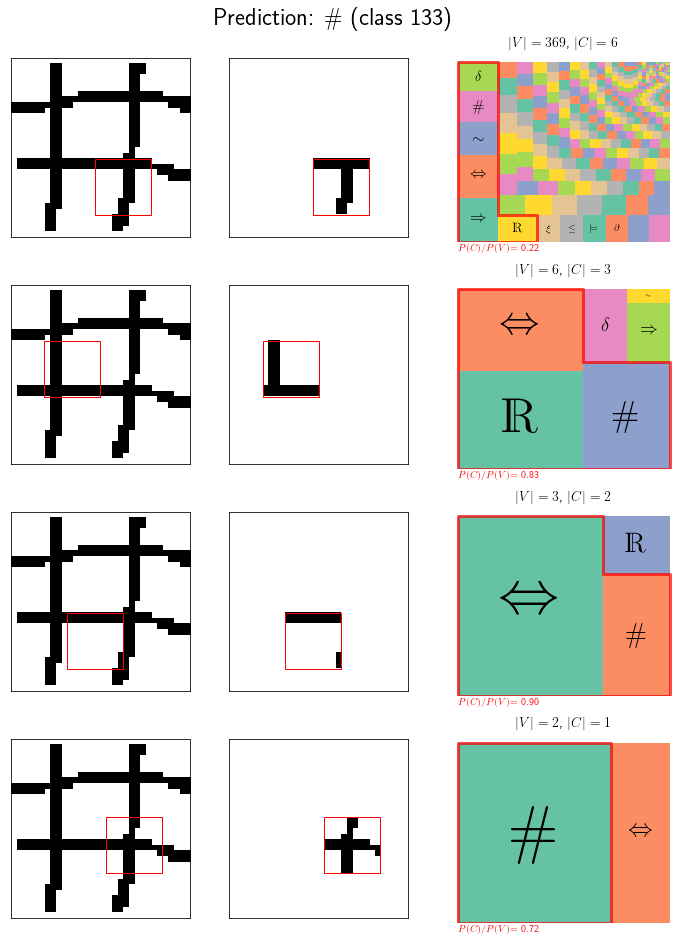

In [64]:
crit_alpha = 0.1
crit_p = 2
Exp = MCExplainer(classifier, mask_model, classes = classes_tex, crit_alpha = crit_alpha,
                  crit_p = crit_p, plot_type = 'treemap')
e = Exp.explain(x, pred.item(), verbose = 0 , show_plot = 0)
save_path = os.path.join(outdir, 'expl_id-{}_alpha-{}.pdf'.format(idx, crit_alpha, crit_p))
e.plot(save_path = save_path)

# TRASH

[0.97388425 0.68611949 0.4218001  0.71742073 0.82178361 0.81825246
 0.67009256 0.86179417 0.5560719  0.84256342]


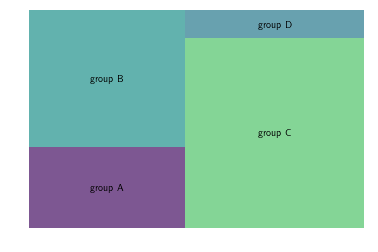

In [35]:
import squarify
a = np.random.rand(10)
print(a)
b = ['A','A','A','A','A','A','A','A','A','A']

ax = squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], alpha=.7 )
plt.axis('off')
plt.show() 

In [389]:
cmap = matplotlib.cm.get_cmap('Set3')

In [396]:
12 % cmap.N

0

In [301]:
print(type(a))
a.__dict__.keys()

<class 'shapely.geometry.polygon.Polygon'>


dict_keys(['_is_empty', '__geom__', '__p__', '_ndim', '_exterior'])

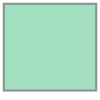

In [265]:
a[1]

Rectangle(xy=(0, 0), width=52.6316, height=100, angle=0)
Rectangle(xy=(52.6316, 0), width=47.3684, height=44.4444, angle=0)


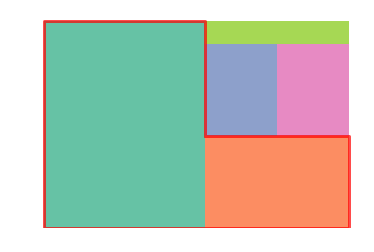

In [330]:
importlib.reload(utils)
from utils import treemap_boundary

treemap_boundary(p, 2)



Rectangle(xy=(0, 0), width=52.6316, height=100, angle=0)
Rectangle(xy=(52.6316, 0), width=47.3684, height=44.4444, angle=0)
Rectangle(xy=(52.6316, 44.4444), width=23.6842, height=44.4444, angle=0)
Rectangle(xy=(76.3158, 44.4444), width=23.6842, height=44.4444, angle=0)
Rectangle(xy=(52.6316, 88.8889), width=47.3684, height=11.1111, angle=0)


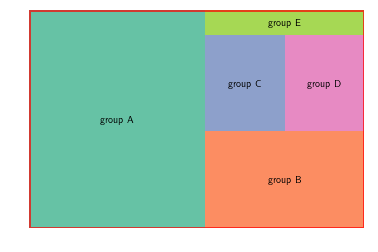

In [323]:
from pprint import pprint
#from matplotlib.patches import Polygon
#from scipy.spatial import ConvexHull
#from UliEngineering.Math.Coordinates import BoundingBox

# def rect_union(R1, R2):
#     """
#         Ri = [x0, x1, y0, y1]
#     """
#     bdy = []
    
#     if R1[0]

    
    
    
    
    #print(d)
    # Boundaries
#     if boundary is not None:
#         eps = 0.25
#         ax.axvline(x=0 + eps, ymin = 0, ymax = 1, c= 'red')
#         ax.axhline(y=100 - eps, xmin = 0, xmax = x[1]/100, c= 'red')
        
#         if len(boundary) == 1:
#             ax.axhline(y=0, xmin = 0, xmax = x[1]/100, c= 'red')
#             ax.axvline(x=x[1], ymin = y[2]/100, ymax = 1, c= 'red')
#         #elif len(boundary) == 2:
            
            
#         d = rects[1]
#         ax.axvline(x=x[1], ymin = y[2]/100, ymax = 1, c= 'red')

#         #print(d)
#         ax.axhline(y=y[2], xmin = x[1]/100, xmax = 1, c= 'red')
    eps= 0.25
    #pp = [[0+eps,0+eps], [0+eps,100-eps]]
    pp = []
    for i,b in enumerate(br[:boundary]):
        print(b)
        w,h = b.get_width(), b.get_height()
        x0, y0 = b.xy
        LL = (x0, y0)  # lower left vertex
        LR = x0+w,y0   # lower right vertex
        TL = x0,y0+h   # top left vertex
        TR = x0+w,y0+h # top right vertex
        print(i, LL, LR, TL, TR)
        pp.extend((LL, LR, TL, TR))
        
        
    pp = BoundingBox(np.array(pp))
    return pp
    
    
#     hull = ConvexHull(pp)
#     pp_ordered = [pp[i] for i in hull.vertices]
#     print(pp_ordered)
#     pp = pp_ordered
    #pp = [(pp[s,0], pp[]]
    #return hull
    #print(asd.asdasd)
#     if boundary == 1:
#         pp.append([x[1], 0+eps])
#         pp.append([x[1], 100-eps])
#     elif len(boundary) == 2:
#         pp.append([])
        
#     for i in range(boundary):
#         # Add all corners of this bar
#         sw = [x[i]  , y[i]]
#         se = [x[i+1], y[i]]
#         ne = [x[i+1], y[i+1]]
#         nw = 
    print(pp)
    # Sort points according to poolar coordinates to get coherent boundary (no crossing)
    # compute centroid
    #cent=(sum([p[0] for p in pp])/len(pp),sum([p[1] for p in pp])/len(pp))
    #sort by polar angle
    #pp.sort(key=lambda p: math.atan2(p[1]-cent[1],p[0]-cent[0]))
    
    print(pp)
    ax.add_patch(Polygon(pp, True, facecolor = 'none', edgecolor = 'r', linewidth = 1.5))


    ax.set_xlim(0, norm_x)
    ax.set_ylim(0, norm_y)
    

    #plt.show()
    
    return ax
    
    
p = [0.5,0.2,0.1,0.1,0.05]
a = treemap(p, boundary = 5)
a

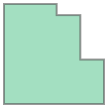

In [292]:
A

<class 'shapely.geometry.polygon.LinearRing'>


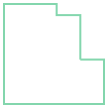

In [294]:
print(type(A.exterior))
A.exterior

<class 'shapely.geometry.linestring.LineString'>


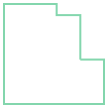

In [295]:
print(type(A.boundary))
A.boundary

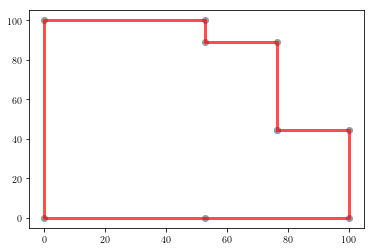

In [315]:
fig, ax = plt.subplots()
plot_coords(ax, a.exterior)
plot_line(ax, a.exterior)

In [186]:
print(a.points)
points = np.random.rand(30, 2)
print(points)
hull = ConvexHull(points)
print(hull.simplices)

[[  0.           0.        ]
 [ 52.63157895   0.        ]
 [  0.         100.        ]
 [ 52.63157895 100.        ]
 [ 52.63157895   0.        ]
 [100.           0.        ]
 [ 52.63157895  44.44444444]
 [100.          44.44444444]
 [ 52.63157895  44.44444444]
 [ 76.31578947  44.44444444]
 [ 52.63157895  88.88888889]
 [ 76.31578947  88.88888889]]
[[0.04269014 0.82418055]
 [0.2617125  0.25970897]
 [0.6317549  0.17123628]
 [0.61149181 0.14928899]
 [0.90512332 0.34096702]
 [0.42087291 0.454543  ]
 [0.38677152 0.18106148]
 [0.03090211 0.44642644]
 [0.85251366 0.09171491]
 [0.91697304 0.20188435]
 [0.76591556 0.74009373]
 [0.85032029 0.97926375]
 [0.02776703 0.63265137]
 [0.222518   0.60432412]
 [0.63020776 0.51733859]
 [0.38146717 0.71337954]
 [0.47230637 0.19676597]
 [0.70258565 0.54505073]
 [0.3221161  0.949995  ]
 [0.14031639 0.71653338]
 [0.49992088 0.70099423]
 [0.85881103 0.48618666]
 [0.37822469 0.47626011]
 [0.80455127 0.57439235]
 [0.53845731 0.02304732]
 [0.21997526 0.02278133]
 

(0, 100)

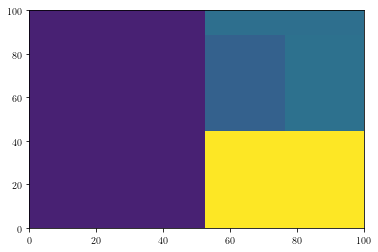

In [91]:
from pprint import pprint
from squarify import pad_rectangle, normalize_sizes
import random
cmap = matplotlib.cm.get_cmap()
ax = plt.gca()
p = [0.5,0.2,0.1,0.1,0.05]
norm_x = 100
norm_y = 100
label=["group A", "group B", "group C", "group D", "group E"]
normed = normalize_sizes(p, norm_x, norm_y)
rects = squarify.squarify(normed, 0, 0, norm_x, norm_y)
# for rect in rects[:2]:
#     pad_rectangle(rect)
x = [rect['x'] for rect in rects]
y = [rect['y'] for rect in rects]
dx = [rect['dx'] for rect in rects]
dy = [rect['dy'] for rect in rects]
color = [cmap(random.random()) for i in range(len(p))]
ax.bar(x, dy, width=dx, bottom=y, color=color,
label=label, align='edge')


ax.set_xlim(0, norm_x)
ax.set_ylim(0, norm_y)

In [49]:
print(pred)
print(fx[0,208:211], fx[0,209])
classes_tex[pred]

tensor([ 94])
tensor([-18.6903, -16.7204, -15.6313]) tensor(-16.7204)


'$\\xi$'

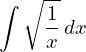

In [69]:
import sympy
x, y, z = sympy.symbols('x y z')
sympy.init_printing()
sympy.Integral(sympy.sqrt(1/x), x)

['k', '\\mathcal{H}', '\\mathcal{L}', '\\mathcal{M}', '\\mathcal{N}', '\\mathcal{O}', '\\mathcal{P}', 'l', '\\mathcal{R}', '\\mathcal{S}']


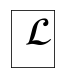

In [66]:
print(ind2sym[:10])

ax = plt.axes([0,0,0.1,0.2]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
plt.text(0.3, 0.4, '$%s$' % ind2sym[2], size = 40)
plt.show()

In [170]:
print(np.histogram(batch_y.numpy(), bins = range(369)))
print(np.histogram(pred.numpy(), bins = range(369)))

(array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1

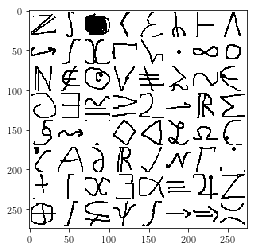

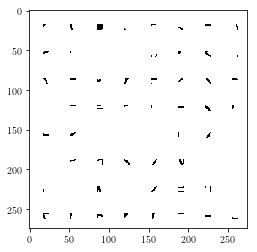

torch.Size([64, 369])


In [17]:
## DEBUG
V = np.array(list(range(0,369)))
mask = torch.zeros(32, 32) # FIXME: SHOULD BE TRUE ZERO
min_S = np.s_[15:23,15:23]
mask[min_S[0],min_S[1]] = 1
w,h = 10, 10
ii = list(range(32)[min_S[0]])[0]
jj = list(range(32)[min_S[1]])[0]

X_s = batch_x*mask.view(1,1,32,32).repeat(batch_x.shape[0], 1, 1, 1)


tensorshow(make_grid(batch_x), True)

tensorshow(make_grid(X_s), True)
# print('Ground Truth :')
# display(Math(' '.join('%5s' % ind2sym[label.item()]
#                                  for label in batch_y)))


#make_latex_grid([ind2sym[label.item()] for label in batch_y[:64]])


output = mask_model(X_s)

print(output.shape)
#X_s = mnist_unnormalize(x)*mask.view(1,1,28,28).repeat(x.shape[0], 1, 1, 1)
#output = mask_model(mnist_normalize(X_s))

In [18]:
print(output)
p, pred = output.max(1)
print(p)
print(pred)





tensor([[ 5.3219e-04,  2.2969e-03,  3.0842e-03,  ...,  2.2933e-03,
          6.2287e-03,  4.4263e-04],
        [ 1.0141e-03,  1.9694e-03,  6.3607e-03,  ...,  1.1552e-03,
          1.9871e-03,  5.5862e-04],
        [ 1.0248e-03,  7.4329e-03,  2.3970e-03,  ...,  2.9096e-03,
          4.1543e-03,  2.7129e-03],
        ...,
        [ 4.5216e-05,  1.9386e-03,  1.0785e-04,  ...,  8.4056e-04,
          3.4177e-03,  9.1307e-05],
        [ 1.7895e-04,  1.6158e-03,  3.5290e-04,  ...,  7.8757e-04,
          3.1749e-03,  5.0060e-04],
        [ 2.5445e-04,  4.2596e-04,  1.4103e-03,  ...,  4.8928e-04,
          6.2369e-04,  5.8787e-04]])
tensor([ 0.1274,  0.2123,  0.0863,  0.1037,  0.0844,  0.1518,  0.1506,
         0.0441,  0.1086,  0.1575,  0.0562,  0.0562,  0.0781,  0.3415,
         0.2338,  0.0377,  0.1532,  0.1239,  0.1862,  0.0579,  0.1353,
         0.1195,  0.0979,  0.1325,  0.0562,  0.1355,  0.1546,  0.0933,
         0.2277,  0.1458,  0.1877,  0.2623,  0.3596,  0.0866,  0.0562,
         0.05

In [201]:
import itertools

class Rectangle:
    def intersection(self, other):
        a, b = self, other
        x1 = max(min(a.x1, a.x2), min(b.x1, b.x2))
        y1 = max(min(a.y1, a.y2), min(b.y1, b.y2))
        x2 = min(max(a.x1, a.x2), max(b.x1, b.x2))
        y2 = min(max(a.y1, a.y2), max(b.y1, b.y2))
        if x1<x2 and y1<y2:
            return type(self)(x1, y1, x2, y2)
    __and__ = intersection

    def difference(self, other):
        inter = self&other
        if not inter:
            yield self
            return
        xs = {self.x1, self.x2}
        ys = {self.y1, self.y2}
        if self.x1<other.x1<self.x2: xs.add(other.x1)
        if self.x1<other.x2<self.x2: xs.add(other.x2)
        if self.y1<other.y1<self.y2: ys.add(other.y1)
        if self.y1<other.y2<self.y2: ys.add(other.y2)
        for (x1, x2), (y1, y2) in itertools.product(
            pairwise(sorted(xs)), pairwise(sorted(ys))
        ):
            rect = type(self)(x1, y1, x2, y2)
            if rect!=inter:
                yield rect
    __sub__ = difference
    
    def union(self, other):
        bdy = []
        # Bottom Left:
        if (self.x1 < other.x1):
            bdy.append((self.x1, self.y1))
            if other.y1 < self.y1:
                bdy.append((other.x1, other.y1))
        else:
            bdy.append((other.x1, other.y1))
        
            

    def __init__(self, x1, y1, x2, y2):
        if x1>x2 or y1>y2:
            raise ValueError("Coordinates are invalid")
        self.x1, self.y1, self.x2, self.y2 = x1, y1, x2, y2

    def __iter__(self):
        yield self.x1
        yield self.y1
        yield self.x2
        yield self.y2

    def __eq__(self, other):
        return isinstance(other, Rectangle) and tuple(self)==tuple(other)
    def __ne__(self, other):
        return not (self==other)

    def __repr__(self):
        return type(self).__name__+repr(tuple(self))


def pairwise(iterable):
    # https://docs.python.org/dev/library/itertools.html#recipes
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)


# 1.
a = Rectangle(0, 0, 1, 1)      # x0, y0, x1, y1
b = Rectangle(0.5, 0.5, 1.5, 1.5)
print(a&b)
# # Rectangle(0.5, 0.5, 1, 1)
print(list(a-b))
# # [Rectangle(0, 0, 0.5, 0.5), Rectangle(0, 0.5, 0.5, 1), Rectangle(0.5, 0, 1, 0.5)]

# # 2.
# b = Rectangle(0.25, 0.25, 1.25, 0.75)
# print(a&b)
# # Rectangle(0.25, 0.25, 1, 0.75)
# print(list(a-b))
# # [Rectangle(0, 0, 0.25, 0.25), Rectangle(0, 0.25, 0.25, 0.75), Rectangle(0, 0.75, 0.25, 1), Rectangle(0.25, 0, 1, 0.25), Rectangle(0.25, 0.75, 1, 1)]

# # 3.
b = Rectangle(0.25, 0.25, 0.75, 0.75)
print(a&b)
# Rectangle(0.25, 0.25, 0.75, 0.75)
print(list(a-b))
# [Rectangle(0, 0, 0.25, 0.25), Rectangle(0, 0.25, 0.25, 0.75), Rectangle(0, 0.75, 0.25, 1), Rectangle(0.25, 0, 0.75, 0.25), Rectangle(0.25, 0.75, 0.75, 1), Rectangle(0.75, 0, 1, 0.25), Rectangle(0.75, 0.25, 1, 0.75), Rectangle(0.75, 0.75, 1, 1)]

# # 4.
# b = Rectangle(5, 5, 10, 10)
# print(a&b)
# # None
# print(list(a-b))
# # [Rectangle(0, 0, 1, 1)]

# # 5.
# b = Rectangle(-5, -5, 10, 10)
# print(a&b)
# # Rectangle(0, 0, 1, 1)
# print(list(a-b))
# # []

Rectangle(0.5, 0.5, 1, 1)
[Rectangle(0, 0, 0.5, 0.5), Rectangle(0, 0.5, 0.5, 1), Rectangle(0.5, 0, 1, 0.5)]
Rectangle(0.25, 0.25, 0.75, 0.75)
[Rectangle(0, 0, 0.25, 0.25), Rectangle(0, 0.25, 0.25, 0.75), Rectangle(0, 0.75, 0.25, 1), Rectangle(0.25, 0, 0.75, 0.25), Rectangle(0.25, 0.75, 0.75, 1), Rectangle(0.75, 0, 1, 0.25), Rectangle(0.75, 0.25, 1, 0.75), Rectangle(0.75, 0.75, 1, 1)]


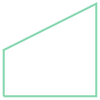

In [231]:
from shapely.geometry import Polygon, box, MultiPolygon
polygon = Polygon([(0, 0), (0, 0.5), (1, 1), (1, 0)], [])
polygon.exterior
#plt.plot(*polygon.exterior)

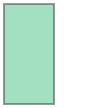

In [241]:
b1 = box(0,0,50,100)
b2 = box(50,0,100,50)
b1


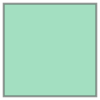

In [242]:
b2

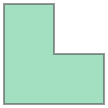

In [248]:
b12 = b1.union(b2)
b12

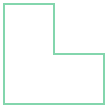

In [251]:
b12.boundary

In [258]:
b12.boundary.coords[:]

[(50.0, 0.0),
 (0.0, 0.0),
 (0.0, 100.0),
 (50.0, 100.0),
 (50.0, 50.0),
 (100.0, 50.0),
 (100.0, 0.0),
 (50.0, 0.0)]

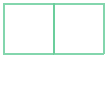

In [234]:
col = MultiPolygon([b1,b2])
col.boundary

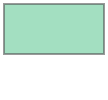

In [235]:
b1.symmetric_difference(b2)

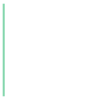

In [236]:
b1.intersection(b2)

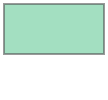

In [237]:
from shapely.ops import cascaded_union

cascaded_union([b1,b2])


In [238]:
print(cascaded_union([b1,b2]))

POLYGON ((50 0, 0 0, 0 50, 50 50, 100 50, 100 0, 50 0))
